In [1]:
import pandas as pd
df=pd.read_csv('d:/data/titanic/train3.csv')
df.head()

,Survived,Pclass,Pclass1,Pclass2,Pclass3,Sex,male,female,Age,SibSp,Parch,Fare
0,0,3,0,0,1,male,1,0,22.0,1,0,7.2500
1,1,1,1,0,0,female,0,1,38.0,1,0,71.2833
2,1,3,0,0,1,female,0,1,26.0,0,0,7.9250
3,1,1,1,0,0,female,0,1,35.0,1,0,53.1000
4,0,3,0,0,1,male,1,0,35.0,0,0,8.0500


In [2]:
df.columns

Index(['Survived', 'Pclass', 'Pclass1', 'Pclass2', 'Pclass3', 'Sex', 'male',
       'female', 'Age', 'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [9]:
train_cols=['Pclass1', 'Pclass2', 'Pclass3','male',
       'female', 'Age', 'SibSp', 'Parch', 'Fare']
X=df[train_cols] #독립변수
y=df['Survived'] #종속변수

In [10]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020005DA7A48>,
      dtype=object)

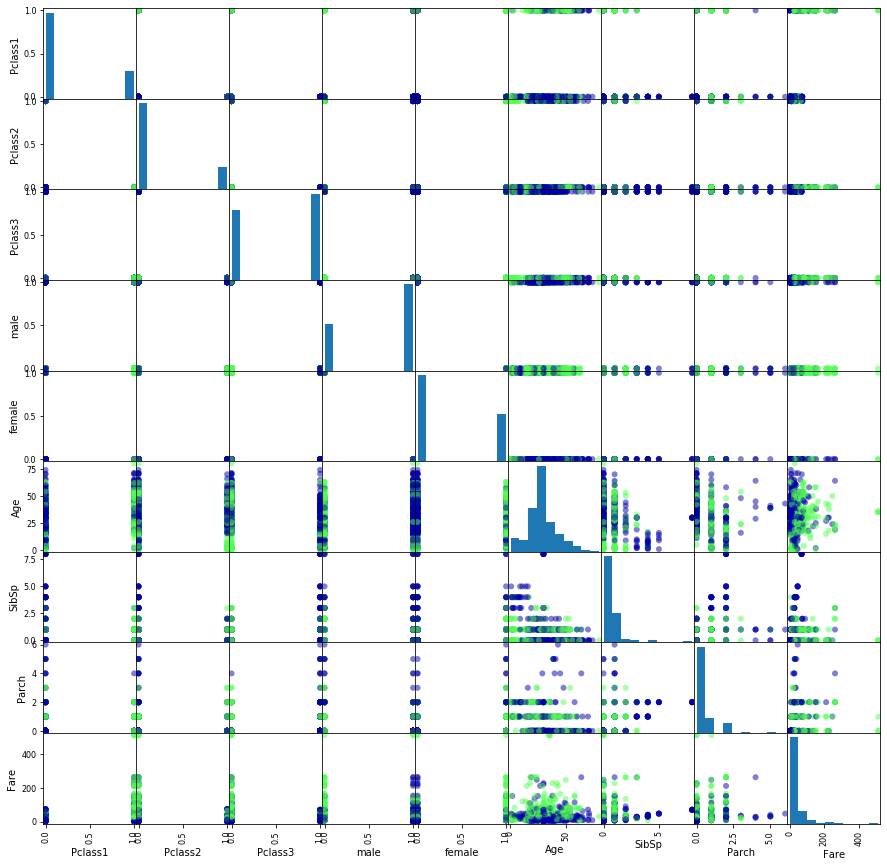

In [11]:
#산점도 행렬 그래프
import mglearn
pd.plotting.scatter_matrix(X,c=y,figsize=(15,15),marker='o',cmap=mglearn.cm3)

Text(0, 0.5, 'Fare')

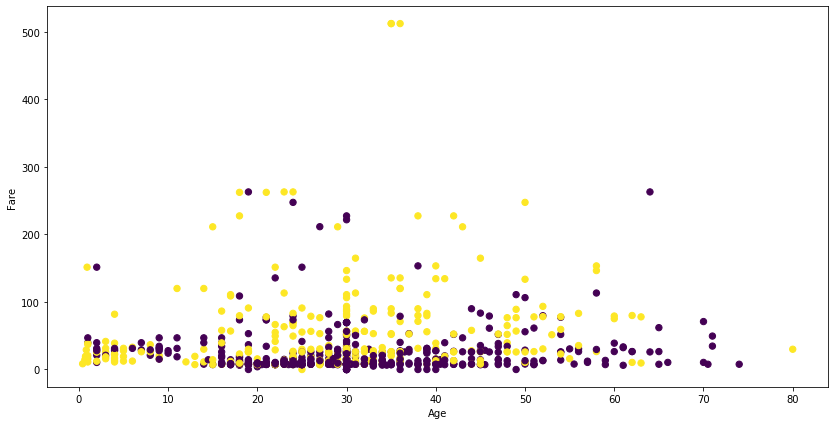

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7)) #그래프 사이즈 가로 14,세로7
plt.scatter(X['Age'],X['Fare'],c=y,s=40) #나이와 요금
plt.xlabel('Age')
plt.ylabel('Fare')

In [13]:
#군집갯수 2개인 KMeans 모형
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2, random_state=0)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [16]:
import numpy as np
print(y.values[:50]) #실제값
print(model.labels_[:50]) #예측한 값
print(np.mean(y==model.labels_))

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.6442199775533108


Text(0, 0.5, 'Fare')

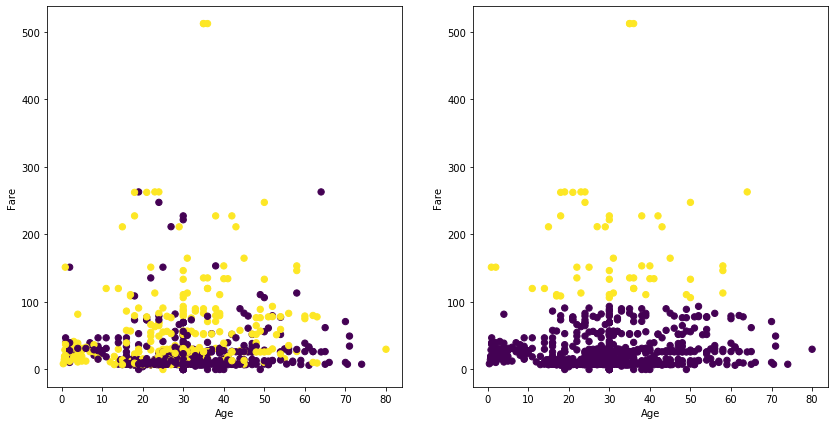

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7)) #그래프 사이즈 가로 14,세로7
#실제값 그래프
plt.subplot(1,2,1)
plt.scatter(X['Age'],X['Fare'],c=y,s=40) #나이와 요금
plt.xlabel('Age')
plt.ylabel('Fare')

#예측값 그래프
plt.subplot(1,2,2)
plt.scatter(X['Age'],X['Fare'],c=model.labels_,s=40) #나이와 요금
plt.xlabel('Age')
plt.ylabel('Fare')
